In [1]:
# import necessary libraries

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor

In [2]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/concrete/slump/slump_test.data"
df = pd.read_csv(url)


In [2]:
# read in the data

df = pd.read_csv('slump_test.data')

In [3]:
# check shape and ensure no null values

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 11 columns):
No                                    103 non-null int64
Cement                                103 non-null float64
Slag                                  103 non-null float64
Fly ash                               103 non-null float64
Water                                 103 non-null float64
SP                                    103 non-null float64
Coarse Aggr.                          103 non-null float64
Fine Aggr.                            103 non-null float64
SLUMP(cm)                             103 non-null float64
FLOW(cm)                              103 non-null float64
Compressive Strength (28-day)(Mpa)    103 non-null float64
dtypes: float64(10), int64(1)
memory usage: 8.9 KB


In [4]:
# look at a preview of the data

df.head()

,No,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm),Compressive Strength (28-day)(Mpa)
0,1,273.0,82.0,105.0,210.0,9.0,904.0,680.0,23.0,62.0,34.99
1,2,163.0,149.0,191.0,180.0,12.0,843.0,746.0,0.0,20.0,41.14
2,3,162.0,148.0,191.0,179.0,16.0,840.0,743.0,1.0,20.0,41.81
3,4,162.0,148.0,190.0,179.0,19.0,838.0,741.0,3.0,21.5,42.08
4,5,154.0,112.0,144.0,220.0,10.0,923.0,658.0,20.0,64.0,26.82


In [5]:
df.columns

Index(['No', 'Cement', 'Slag', 'Fly ash', 'Water', 'SP', 'Coarse Aggr.',
       'Fine Aggr.', 'SLUMP(cm)', 'FLOW(cm)',
       'Compressive Strength (28-day)(Mpa)'],
      dtype='object')

In [6]:
# make column names easier
df.columns = df.columns.str.lower()
df.columns = df.columns.str.replace(' ', '_')
df.columns = df.columns.str.replace('.', '')

In [7]:
# look at various stats such as mean, std, min, and max to get an idea of the distribution
df.describe()

,no,cement,slag,fly_ash,water,sp,coarse_aggr,fine_aggr,slump(cm),flow(cm),compressive_strength_(28-day)(mpa)
count,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.00000,103.000000
mean,52.000000,229.894175,77.973786,149.014563,197.167961,8.539806,883.978641,739.604854,18.048544,49.61068,36.039417
std,29.877528,78.877230,60.461363,85.418080,20.208158,2.807530,88.391393,63.342117,8.750844,17.56861,7.838232
min,1.000000,137.000000,0.000000,0.000000,160.000000,4.400000,708.000000,640.600000,0.000000,20.00000,17.190000
25%,26.500000,152.000000,0.050000,115.500000,180.000000,6.000000,819.500000,684.500000,14.500000,38.50000,30.900000
50%,52.000000,248.000000,100.000000,164.000000,196.000000,8.000000,879.000000,742.700000,21.500000,54.00000,35.520000
75%,77.500000,303.900000,125.000000,235.950000,209.500000,10.000000,952.800000,788.000000,24.000000,63.75000,41.205000
max,103.000000,374.000000,193.000000,260.000000,240.000000,19.000000,1049.900000,902.000000,29.000000,78.00000,58.530000


In [8]:
# look into the data when certain variables are 0 in order to make sure they aren't just errors
df[df['slag'] == 0]

,no,cement,slag,fly_ash,water,sp,coarse_aggr,fine_aggr,slump(cm),flow(cm),compressive_strength_(28-day)(mpa)
7,8,145.0,0.0,227.0,240.0,6.0,750.0,853.0,14.50,58.5,36.59
8,9,152.0,0.0,237.0,204.0,6.0,785.0,892.0,15.50,51.0,32.71
9,10,304.0,0.0,140.0,214.0,6.0,895.0,722.0,19.00,51.0,38.46
13,14,354.0,0.0,0.0,234.0,6.0,959.0,691.0,17.00,54.0,33.91
14,15,374.0,0.0,0.0,190.0,7.0,1013.0,730.0,14.50,42.5,32.44
16,17,153.0,0.0,239.0,200.0,6.0,1002.0,684.0,12.00,35.0,28.29
18,19,310.0,0.0,143.0,168.0,10.0,914.0,804.0,20.50,48.2,49.30
21,22,310.0,0.0,143.0,218.0,10.0,787.0,804.0,13.00,46.0,36.19
29,30,314.0,0.0,161.0,207.0,6.0,851.0,757.0,21.50,64.0,41.14
30,31,321.0,0.0,164.0,190.0,5.0,870.0,774.0,24.00,60.0,45.82


In [9]:
df[df['fly_ash'] == 0]

,no,cement,slag,fly_ash,water,sp,coarse_aggr,fine_aggr,slump(cm),flow(cm),compressive_strength_(28-day)(mpa)
13,14,354.0,0.0,0.0,234.0,6.0,959.0,691.0,17.0,54.0,33.91
14,15,374.0,0.0,0.0,190.0,7.0,1013.0,730.0,14.5,42.5,32.44
19,20,296.0,97.0,0.0,219.0,9.0,932.0,685.0,15.0,48.5,29.23
20,21,305.0,100.0,0.0,196.0,10.0,959.0,705.0,20.0,49.0,29.77
22,23,148.0,180.0,0.0,183.0,11.0,972.0,757.0,0.0,20.0,18.52
23,24,146.0,178.0,0.0,192.0,11.0,961.0,749.0,18.0,46.0,17.19
37,38,165.0,150.0,0.0,182.0,12.0,1023.0,729.0,14.5,20.0,18.26
43,44,291.0,105.0,0.0,205.0,6.0,859.0,797.0,24.0,59.0,27.62
44,45,298.0,107.0,0.0,186.0,6.0,879.0,815.0,3.0,20.0,30.97
45,46,318.0,126.0,0.0,210.0,6.0,861.0,737.0,17.5,48.0,31.77


In [10]:
df[df['slump(cm)'] == 0]

,no,cement,slag,fly_ash,water,sp,coarse_aggr,fine_aggr,slump(cm),flow(cm),compressive_strength_(28-day)(mpa)
1,2,163.0,149.0,191.0,180.0,12.0,843.0,746.0,0.0,20.0,41.14
6,7,152.0,139.0,178.0,168.0,18.0,944.0,695.0,0.0,20.0,38.86
22,23,148.0,180.0,0.0,183.0,11.0,972.0,757.0,0.0,20.0,18.52
24,25,142.0,130.0,167.0,174.0,11.0,883.0,785.0,0.0,20.0,36.72
48,49,332.0,0.0,170.0,160.0,6.0,900.0,806.0,0.0,20.0,58.53
70,71,276.0,90.0,116.0,180.0,9.0,870.0,768.0,0.0,20.0,44.08
93,94,172.0,162.1,238.5,166.0,7.4,953.3,641.4,0.0,20.0,41.54
94,95,172.8,158.3,239.5,166.4,7.4,952.6,644.1,0.0,20.0,41.81
95,96,184.3,153.4,239.2,179.0,7.5,920.2,640.9,0.0,20.0,41.01
98,99,248.3,101.0,239.1,168.9,7.7,954.2,640.6,0.0,20.0,49.97


In [11]:
# check the correlations of all variables 
df.corr()

,no,cement,slag,fly_ash,water,sp,coarse_aggr,fine_aggr,slump(cm),flow(cm),compressive_strength_(28-day)(mpa)
no,1.000000,-0.031628,-0.079806,0.340834,-0.138476,-0.334644,0.222075,-0.314376,0.037385,0.008659,0.186274
cement,-0.031628,1.000000,-0.243553,-0.486535,0.221091,-0.106387,-0.309857,0.056959,0.145913,0.186461,0.445725
slag,-0.079806,-0.243553,1.000000,-0.322619,-0.026775,0.306504,-0.223792,-0.183522,-0.284037,-0.327231,-0.331588
fly_ash,0.340834,-0.486535,-0.322619,1.000000,-0.241321,-0.143508,0.172620,-0.282854,-0.118621,-0.055423,0.444393
water,-0.138476,0.221091,-0.026775,-0.241321,1.000000,-0.155456,-0.602201,0.114591,0.466568,0.632026,-0.254235
sp,-0.334644,-0.106387,0.306504,-0.143508,-0.155456,1.000000,-0.104159,0.058290,-0.212902,-0.176314,-0.037871
coarse_aggr,0.222075,-0.309857,-0.223792,0.172620,-0.602201,-0.104159,1.000000,-0.488537,-0.188157,-0.325787,-0.160684
fine_aggr,-0.314376,0.056959,-0.183522,-0.282854,0.114591,0.058290,-0.488537,1.000000,0.202272,0.190370,-0.154484
slump(cm),0.037385,0.145913,-0.284037,-0.118621,0.466568,-0.212902,-0.188157,0.202272,1.000000,0.906135,-0.223358
flow(cm),0.008659,0.186461,-0.327231,-0.055423,0.632026,-0.176314,-0.325787,0.190370,0.906135,1.000000,-0.124029


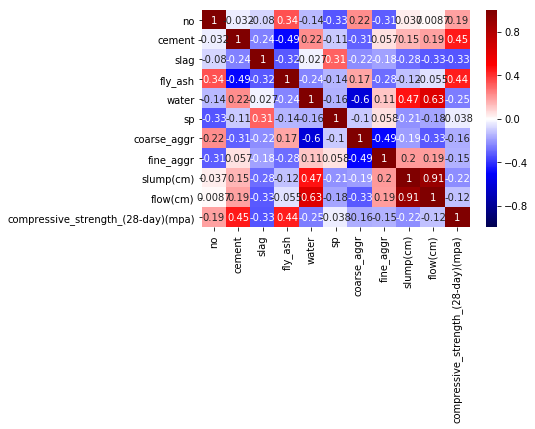

In [12]:
# generate a heatmap in order to more easily look for especially high correlations

sns.heatmap(df.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1);

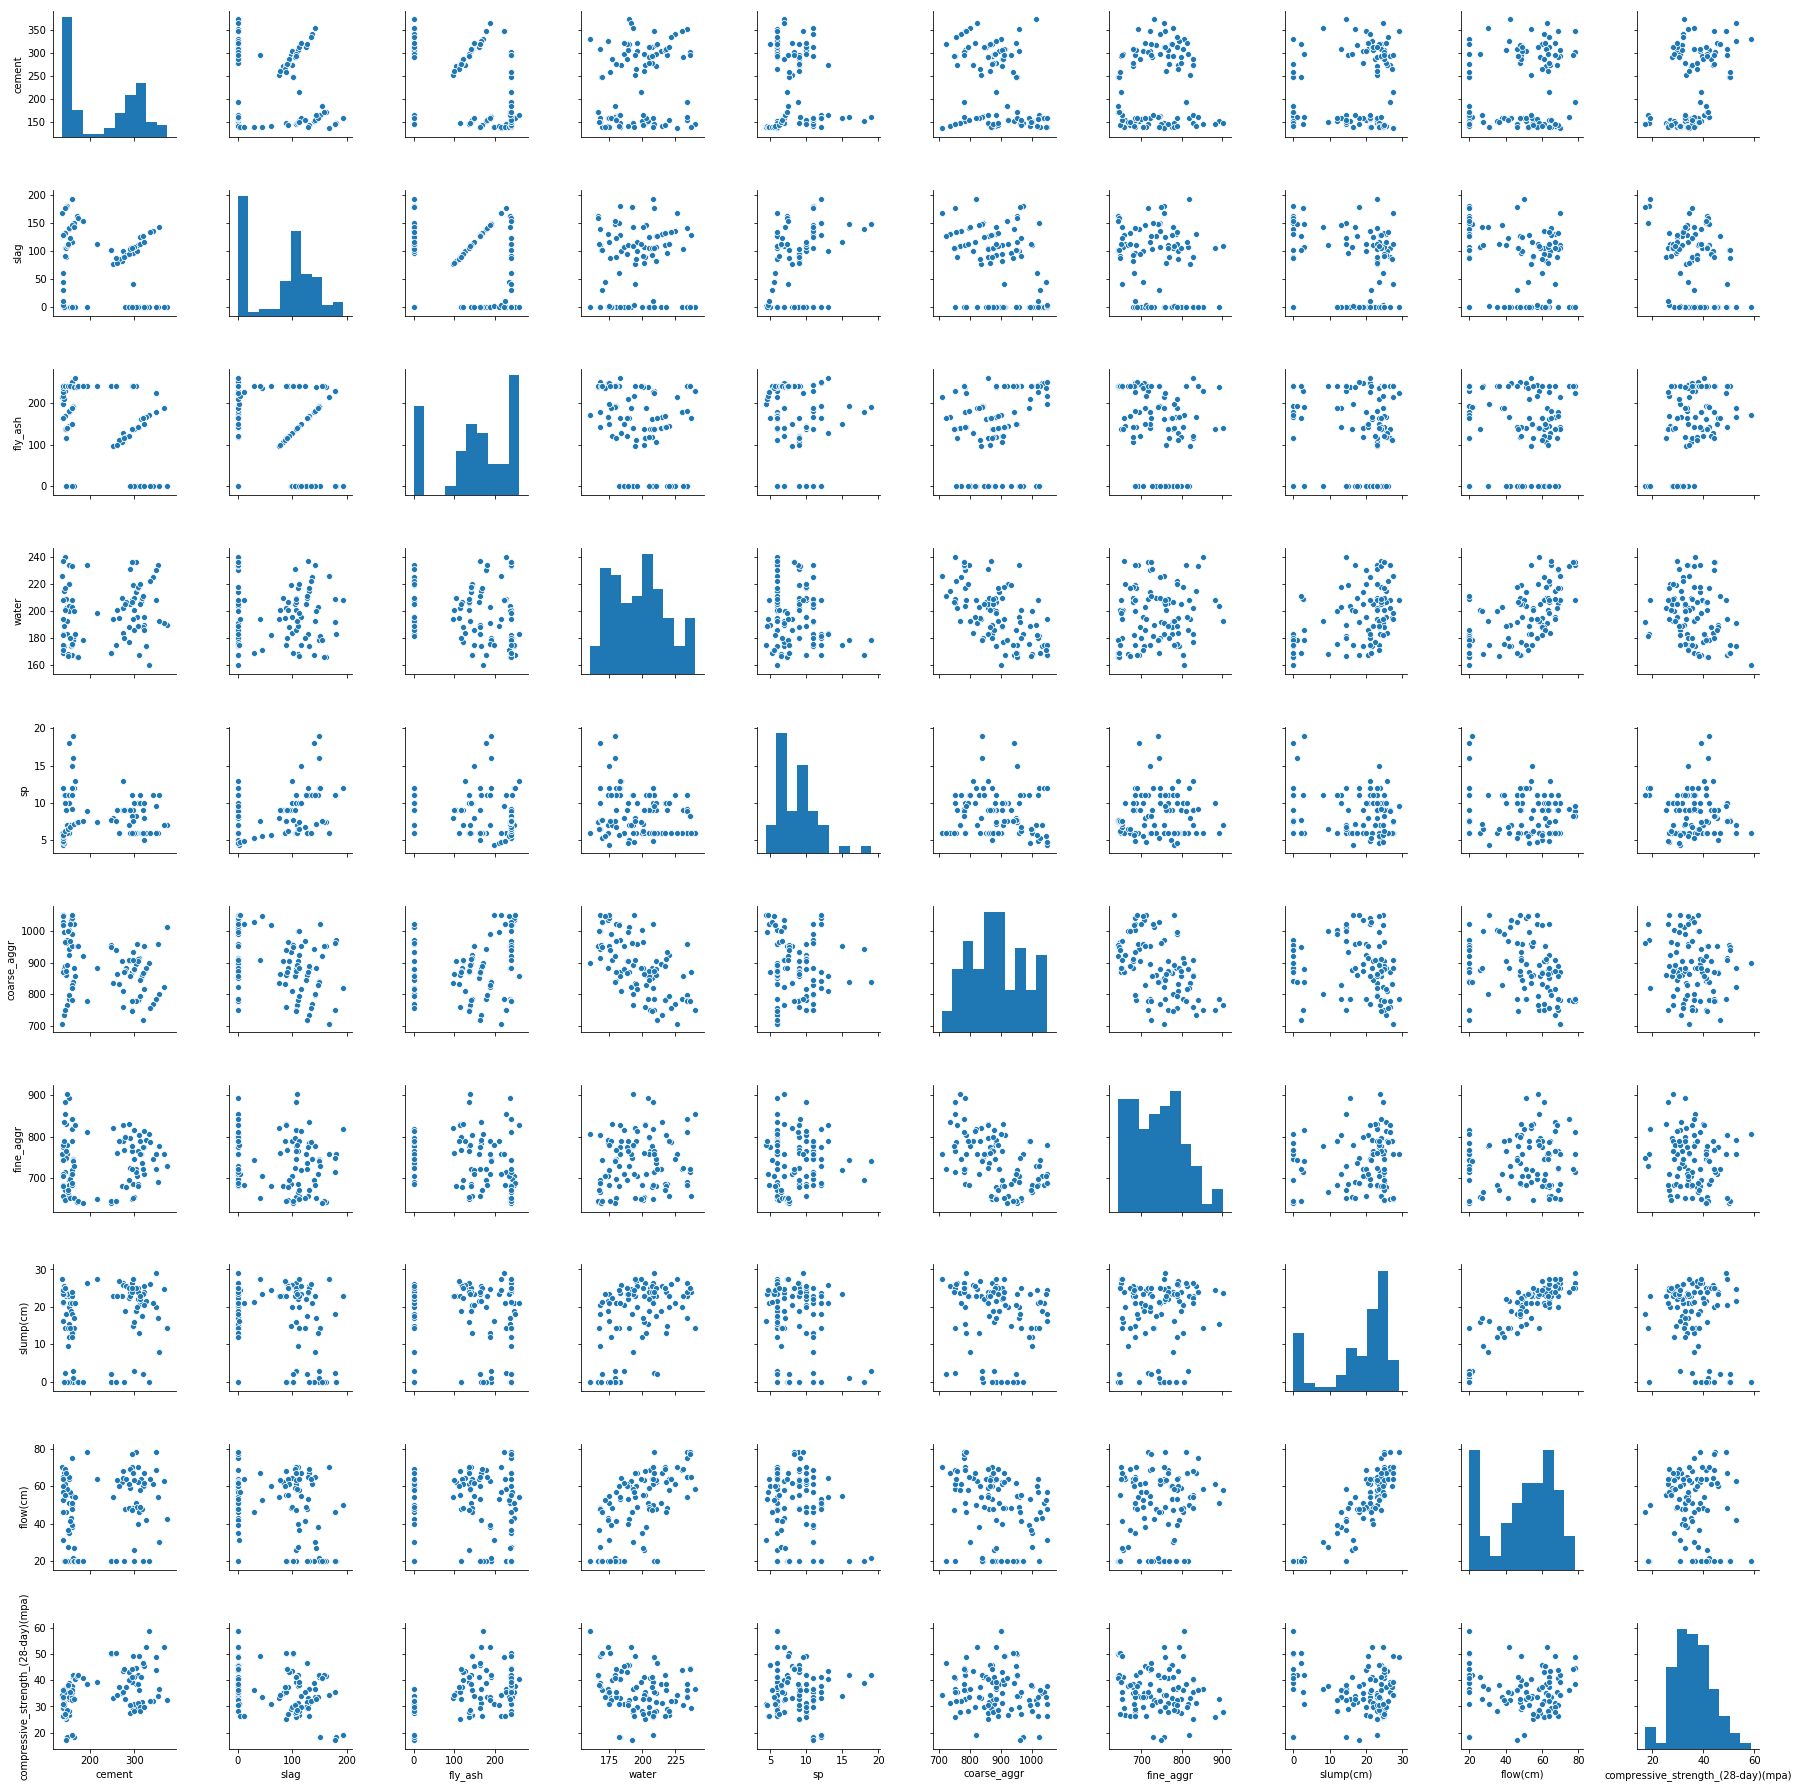

In [155]:
# generate scatterplots for all of the variables in order to find any strange relations and better understand the data
sns.pairplot(df.drop('no', axis=1))

Generate distribution plots of all variables to get a better idea of how spread out they are

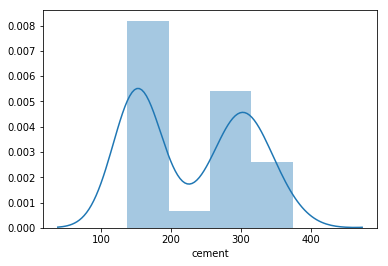

In [160]:
sns.distplot(df.cement)

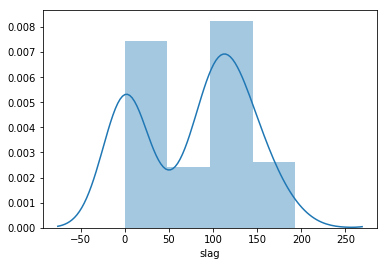

In [161]:
sns.distplot(df.slag)

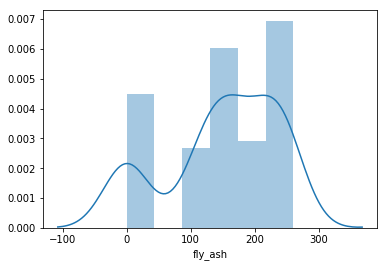

In [162]:
sns.distplot(df.fly_ash)

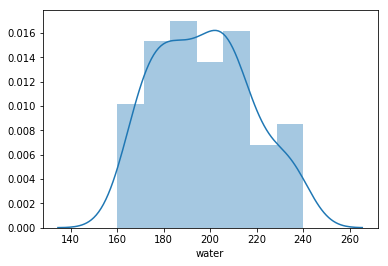

In [163]:
sns.distplot(df.water)

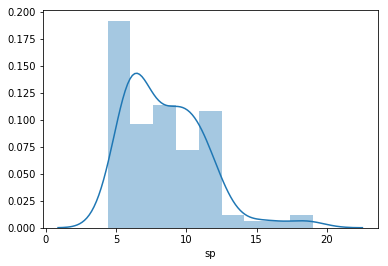

In [164]:
sns.distplot(df.sp)

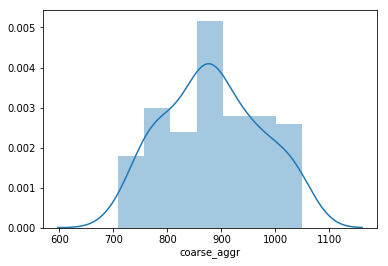

In [165]:
sns.distplot(df.coarse_aggr)

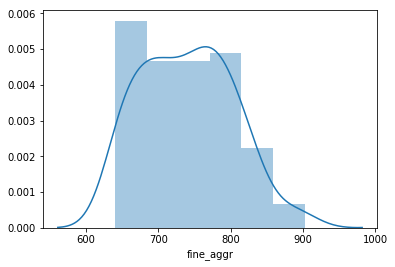

In [166]:
sns.distplot(df.fine_aggr)

The first step of my EDA process was to check the shape of the data and make sure there were no missing values.  Then, I looked at some statistics such as the max, min, and standard deviation in order to get a sense of the distribution of the variables; as it turned out, many of them have quite a difference between the minimum and maximum values.  I also noticed that the slag, fly ash, and slump had some values of 0, so I looked around online to ensure that those are possible values in concrete.  After that, I looked at the correlation values of every variable in order to see how they might affect each other.  It seems that slump and flow are very highly correlated; the higher the value of slump, the higher the value of flow and vice versa.  Water also had quite an impact on slump and even more so on flow.  Meanwhile, cement and fly ash seem to have the highest correlation with compressive strength; suggesting that making concrete with a lot of cement and fly ash will yield high strength.  Finally, water and coarse aggregate appear to be inversely correlated; the more water put into a batch of concrete, the less coarse aggregate there will be included.

Next, I generated distribution plots of each variable so that I could get a better idea of how much the values vary.  I found it very interesting that cement, slag, and fly ash all have bimodal distributions, meaning they're almost always either particularly high or low values; there are large gaps of values where they do not have datapoints.  This could suggest that there are at least two distinct types of concrete.  After looking at the distributions, I took a closer look at the relationships between variables by generating scatterplots for every possible pair.  Upon actually seeing the data points graphed against each other, I found that there weren't many especially strong correlations besides flow and slump, and water and flow.  I believe that further domain knowledge is may be necessary in order to parse out how these different ingredients interact with each other.

The exploratory data analysis that I have performed has piqued my interest in how cement, slag, and fly ash may be used somewhat interchangeably, as well as why there may be certain amounts of each that simply are not used in the creation of concrete.  I am also interested in figuring out if the ratios of given variables are very important in determining the strength, flow, and slump, since none of the scatterplots showed any especially powerful correlations.

In [199]:
# utilize Sturges' rule to determine number of bins: 5
K = 1 + math.log(103, 3.322)
K

4.860450058203283

In [193]:
# define rough bin ranges to stratify CS into
cs_bins = ["[{0} - {1}]".format(cs, cs + 10) for cs in range(10, 60, 10)]
cs_bins

['[10 - 20]', '[20 - 30]', '[30 - 40]', '[40 - 50]', '[50 - 60]']

In [194]:
# create bins 
df['cs_bin'] = pd.cut(x=df['compressive_strength_(28-day)(mpa)'], bins=len(cs_bins), labels=cs_bins, right=False)


In [207]:
df.head()

,no,cement,slag,fly_ash,water,sp,coarse_aggr,fine_aggr,slump(cm),flow(cm),compressive_strength_(28-day)(mpa),cs_bin
0,1,273.0,82.0,105.0,210.0,9.0,904.0,680.0,23.0,62.0,34.99,[30 - 40]
1,2,163.0,149.0,191.0,180.0,12.0,843.0,746.0,0.0,20.0,41.14,[30 - 40]
2,3,162.0,148.0,191.0,179.0,16.0,840.0,743.0,1.0,20.0,41.81,[30 - 40]
3,4,162.0,148.0,190.0,179.0,19.0,838.0,741.0,3.0,21.5,42.08,[40 - 50]
4,5,154.0,112.0,144.0,220.0,10.0,923.0,658.0,20.0,64.0,26.82,[20 - 30]


In [225]:
# split the data into respective bins 
df10_20 = df[df['cs_bin'] == '[10 - 20]']
df20_30 = df[df['cs_bin'] == '[20 - 30]']
df30_40 = df[df['cs_bin'] == '[30 - 40]']
df40_50 = df[df['cs_bin'] == '[40 - 50]']
df50_60 = df[df['cs_bin'] == '[50 - 60]']

Find correlation coefficients for each bin

In [232]:
cs_corr_10_20_list = []
for column in df10_20.drop(['no', 'slump(cm)', 'flow(cm)', 'cs_bin'], axis=1).columns:
    cs_corr_10_20_list.append(df10_20['compressive_strength_(28-day)(mpa)'].corr(df10_20[column]))
cs_corrs_10_20 = pd.Series(cs_corr_10_20_list, index=df10_20.drop(['no', 'slump(cm)', 'flow(cm)', 'cs_bin'], axis=1).columns)

In [234]:
cs_corr_20_30_list = []
for column in df20_30.drop(['no', 'slump(cm)', 'flow(cm)', 'cs_bin'], axis=1).columns:
    cs_corr_20_30_list.append(df20_30['compressive_strength_(28-day)(mpa)'].corr(df20_30[column]))
cs_corrs_20_30 = pd.Series(cs_corr_20_30_list, index=df20_30.drop(['no', 'slump(cm)', 'flow(cm)', 'cs_bin'], axis=1).columns)

In [235]:
cs_corr_30_40_list = []
for column in df30_40.drop(['no', 'slump(cm)', 'flow(cm)', 'cs_bin'], axis=1).columns:
    cs_corr_30_40_list.append(df30_40['compressive_strength_(28-day)(mpa)'].corr(df30_40[column]))
cs_corrs_30_40 = pd.Series(cs_corr_30_40_list, index=df30_40.drop(['no', 'slump(cm)', 'flow(cm)', 'cs_bin'], axis=1).columns)

In [236]:
cs_corr_40_50_list = []
for column in df40_50.drop(['no', 'slump(cm)', 'flow(cm)', 'cs_bin'], axis=1).columns:
    cs_corr_40_50_list.append(df40_50['compressive_strength_(28-day)(mpa)'].corr(df40_50[column]))
cs_corrs_40_50 = pd.Series(cs_corr_40_50_list, index=df40_50.drop(['no', 'slump(cm)', 'flow(cm)', 'cs_bin'], axis=1).columns)

In [237]:
cs_corr_50_60_list = []
for column in df50_60.drop(['no', 'slump(cm)', 'flow(cm)', 'cs_bin'], axis=1).columns:
    cs_corr_50_60_list.append(df50_60['compressive_strength_(28-day)(mpa)'].corr(df50_60[column]))
cs_corrs_50_60 = pd.Series(cs_corr_50_60_list, index=df50_60.drop(['no', 'slump(cm)', 'flow(cm)', 'cs_bin'], axis=1).columns)


Plot the correlations between variables within each bin

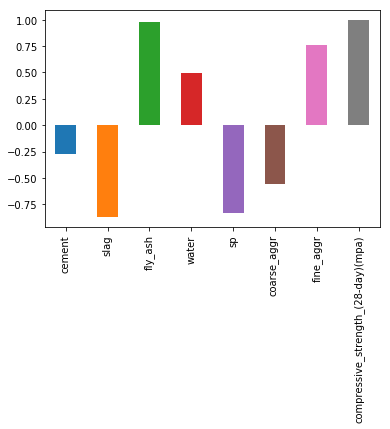

In [239]:
cs_corrs_10_20.plot.bar()

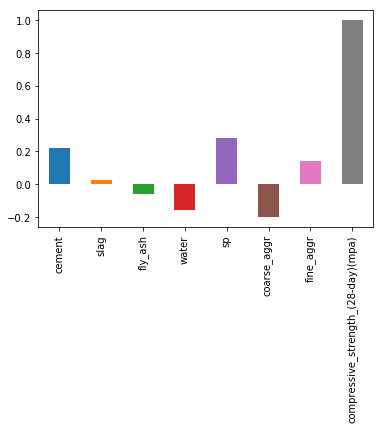

In [240]:
cs_corrs_20_30.plot.bar()

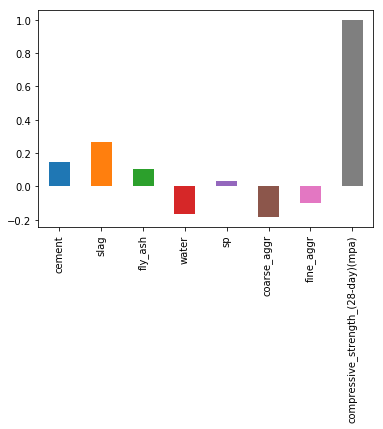

In [241]:
cs_corrs_30_40.plot.bar()

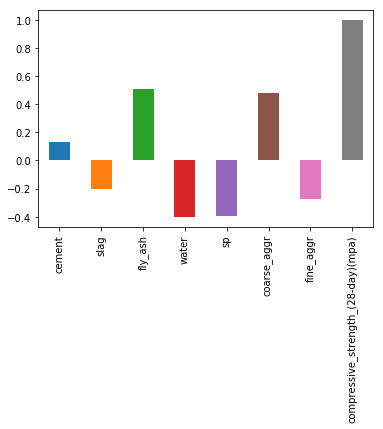

In [242]:
cs_corrs_40_50.plot.bar()

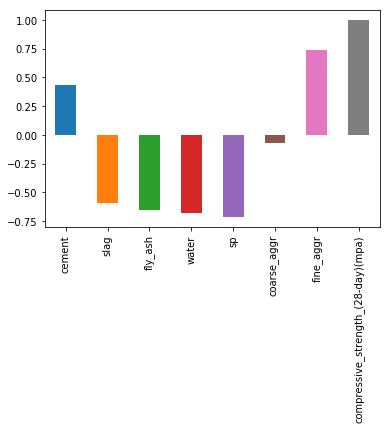

In [244]:
cs_corrs_50_60.plot.bar()

In [245]:
# check distribution within bins 
df['cs_bin'].value_counts()

[30 - 40]    40
[20 - 30]    37
[40 - 50]    17
[10 - 20]     5
[50 - 60]     4
Name: cs_bin, dtype: int64

In [252]:
# check average correlation between variables and compressive strength
cs_corr = []
for column in df.drop(['no', 'slump(cm)', 'flow(cm)', 'cs_bin'], axis=1).columns:
    cs_corr.append(df['compressive_strength_(28-day)(mpa)'].corr(df[column]))
cs_corrs = pd.Series(cs_corr, index=df.drop(['no', 'slump(cm)', 'flow(cm)', 'cs_bin'], axis=1).columns)

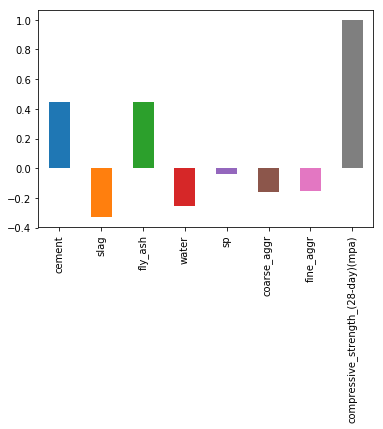

In [253]:
cs_corrs.plot.bar()

In [89]:
extra_columns = ['No', 'SLUMP(cm)', 'FLOW(cm)', 'cs_bin']

Create more scatterplots to show the relationship between the variables and compressive strength, broken into the 5 bins.  This way I can see if certain inputs correlate highly depending on whether the concrete is particularly strong or weak.

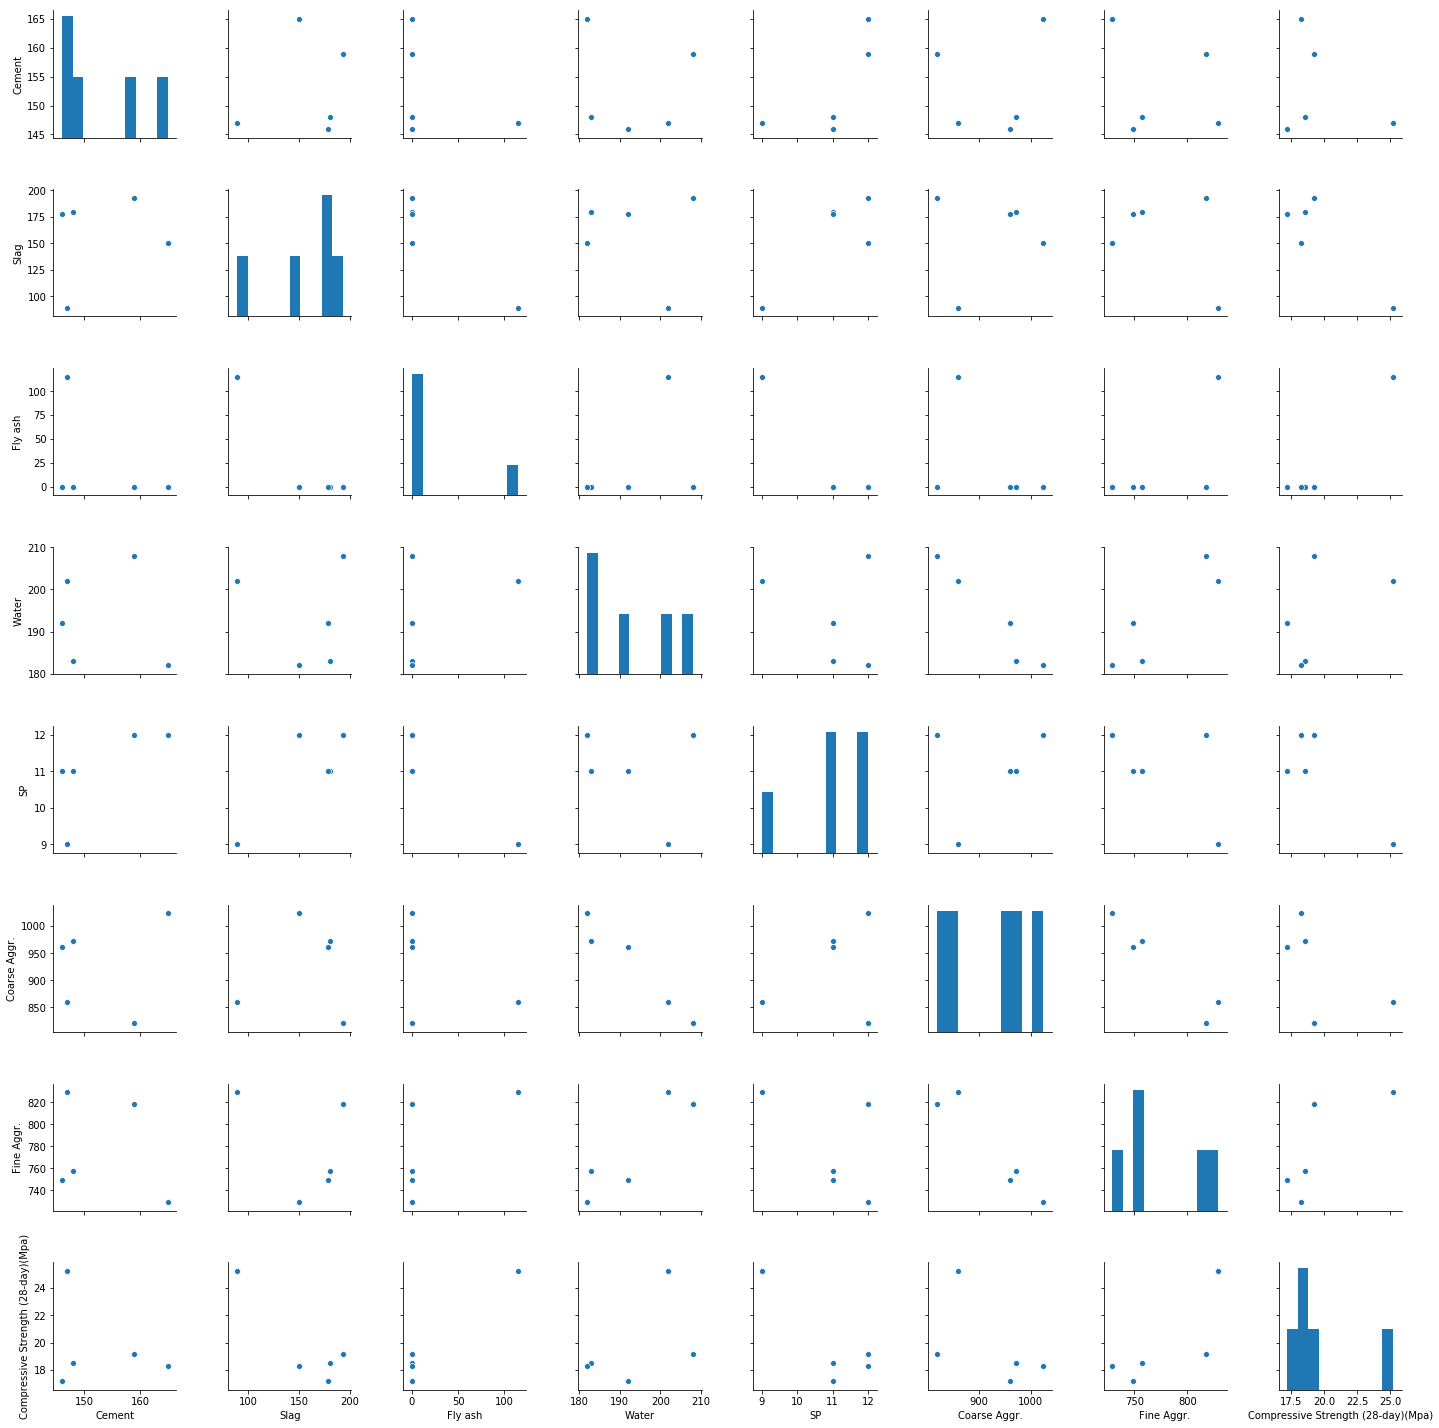

In [94]:
sns.pairplot(df[df['cs_bin'] == '[10 - 20]'].drop(extra_columns, axis=1))

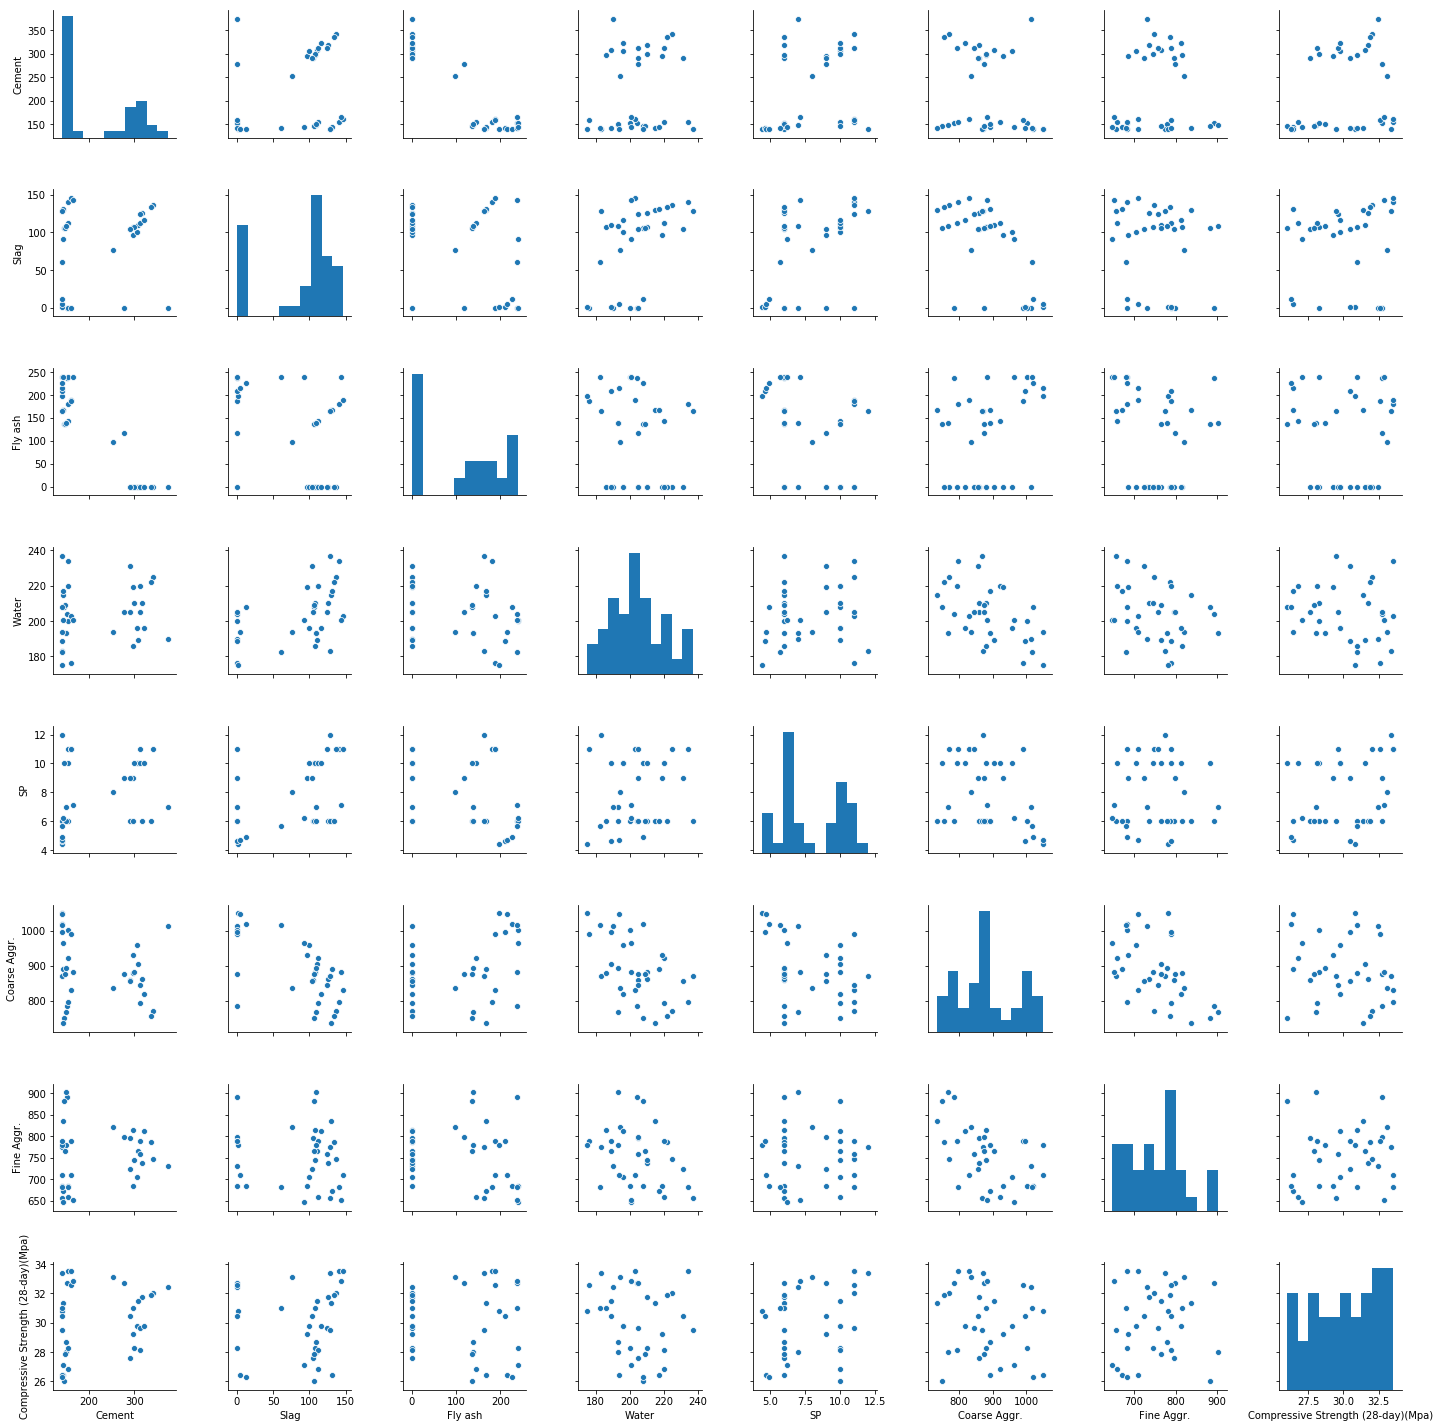

In [97]:
sns.pairplot(df[df['cs_bin'] == '[20 - 30]'].drop(extra_columns, axis=1))

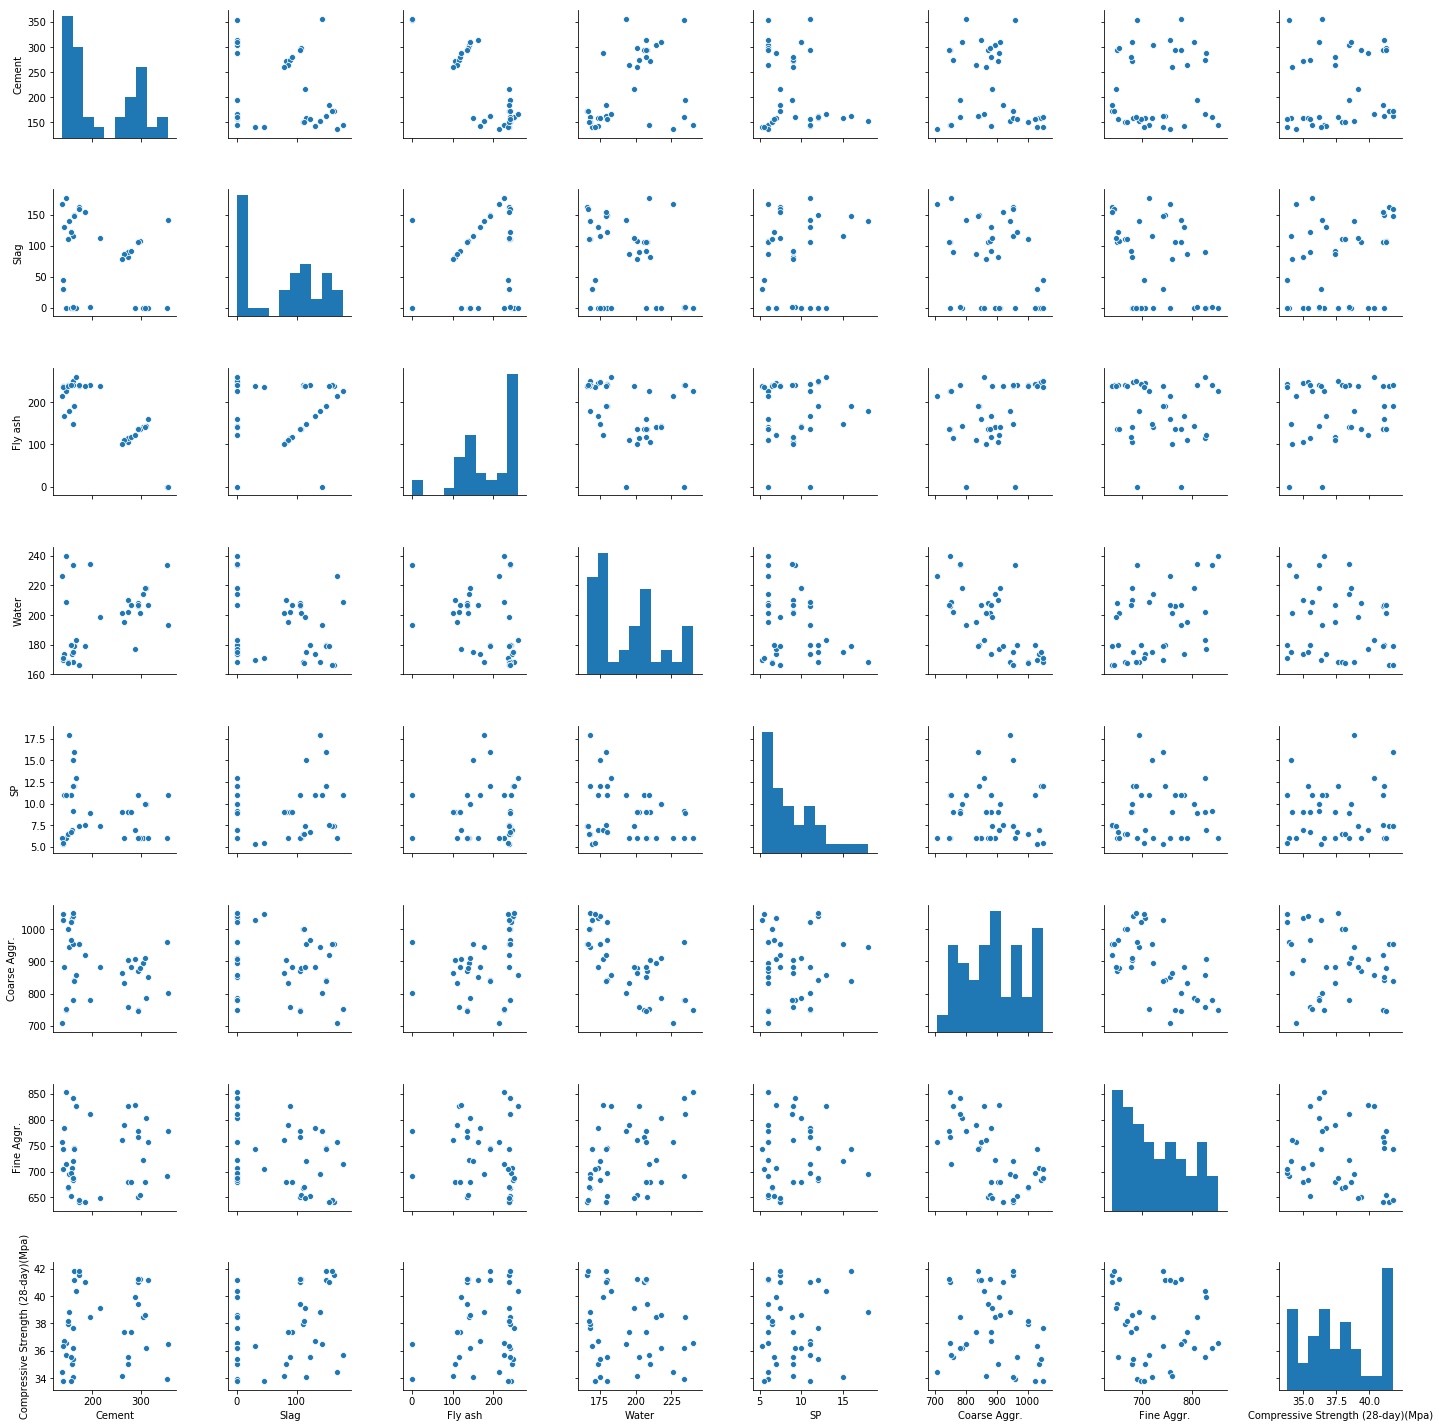

In [98]:
sns.pairplot(df[df['cs_bin'] == '[30 - 40]'].drop(extra_columns, axis=1))

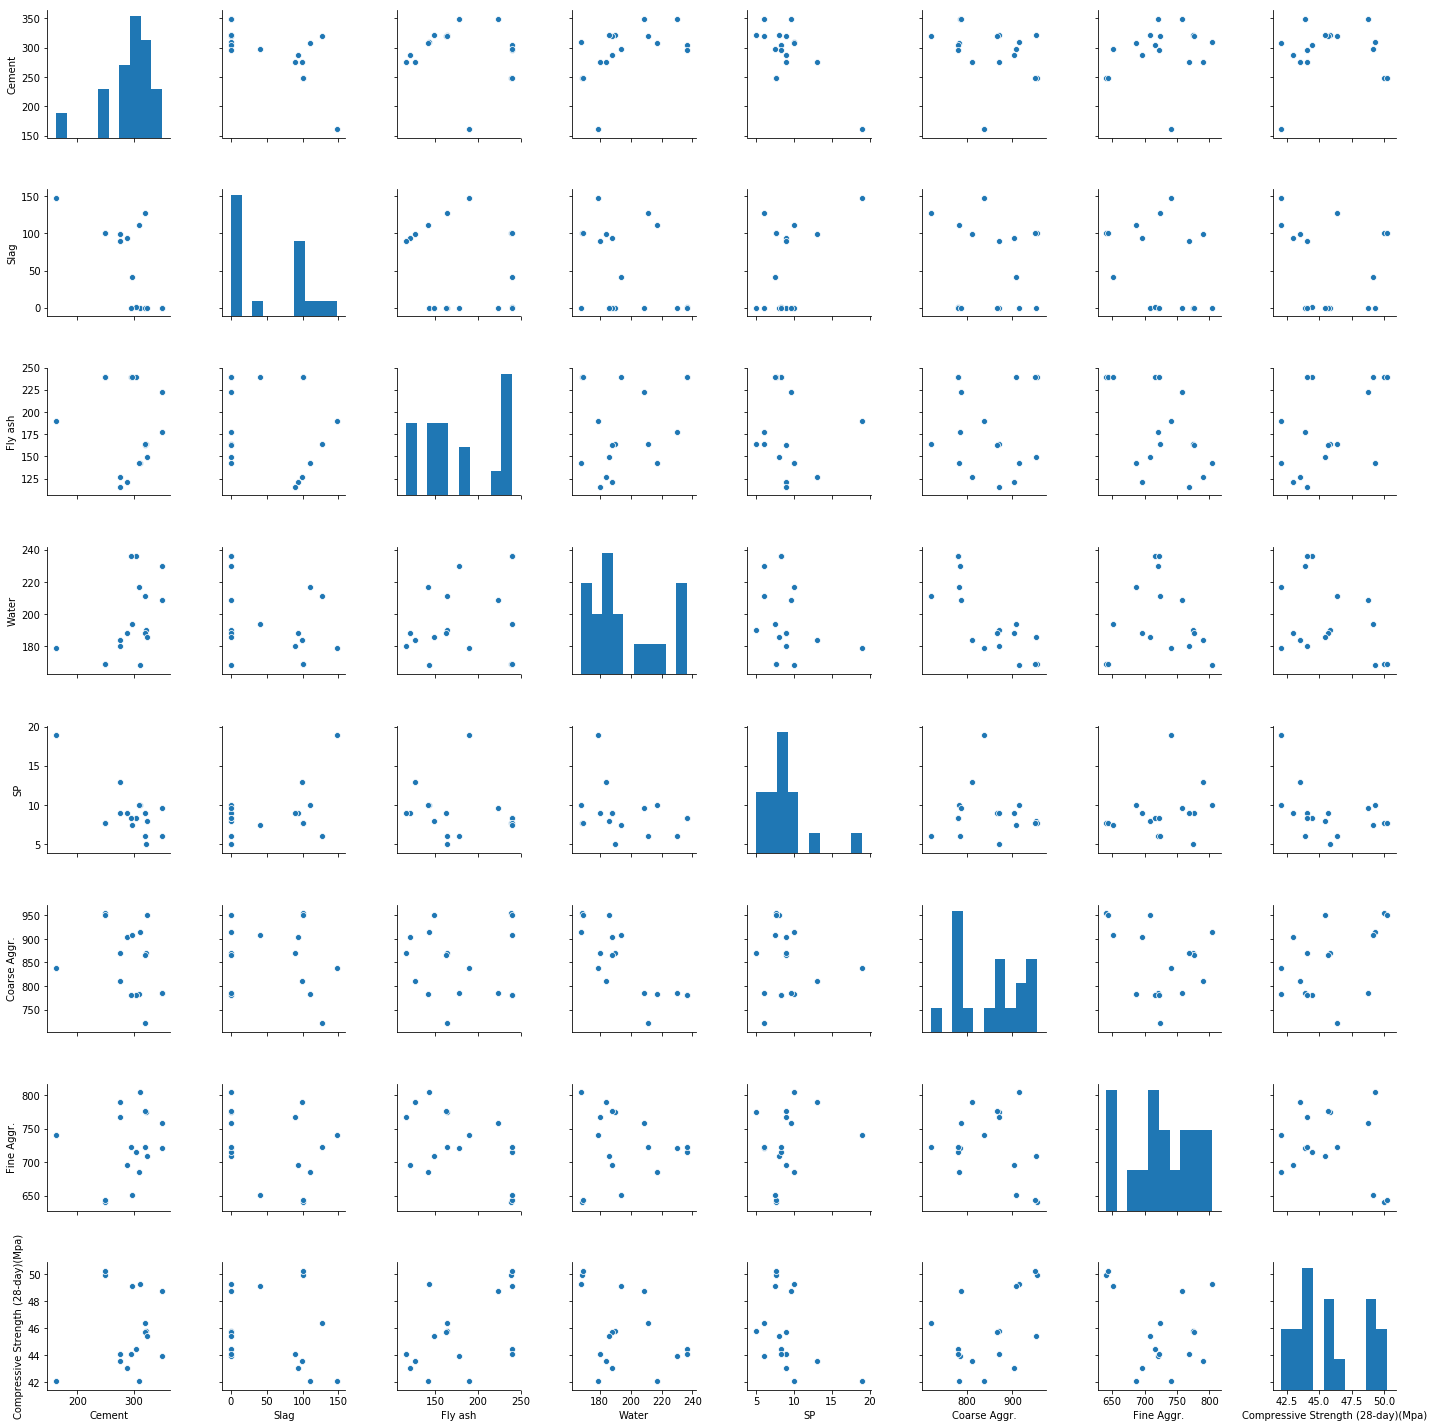

In [99]:
sns.pairplot(df[df['cs_bin'] == '[40 - 50]'].drop(extra_columns, axis=1))

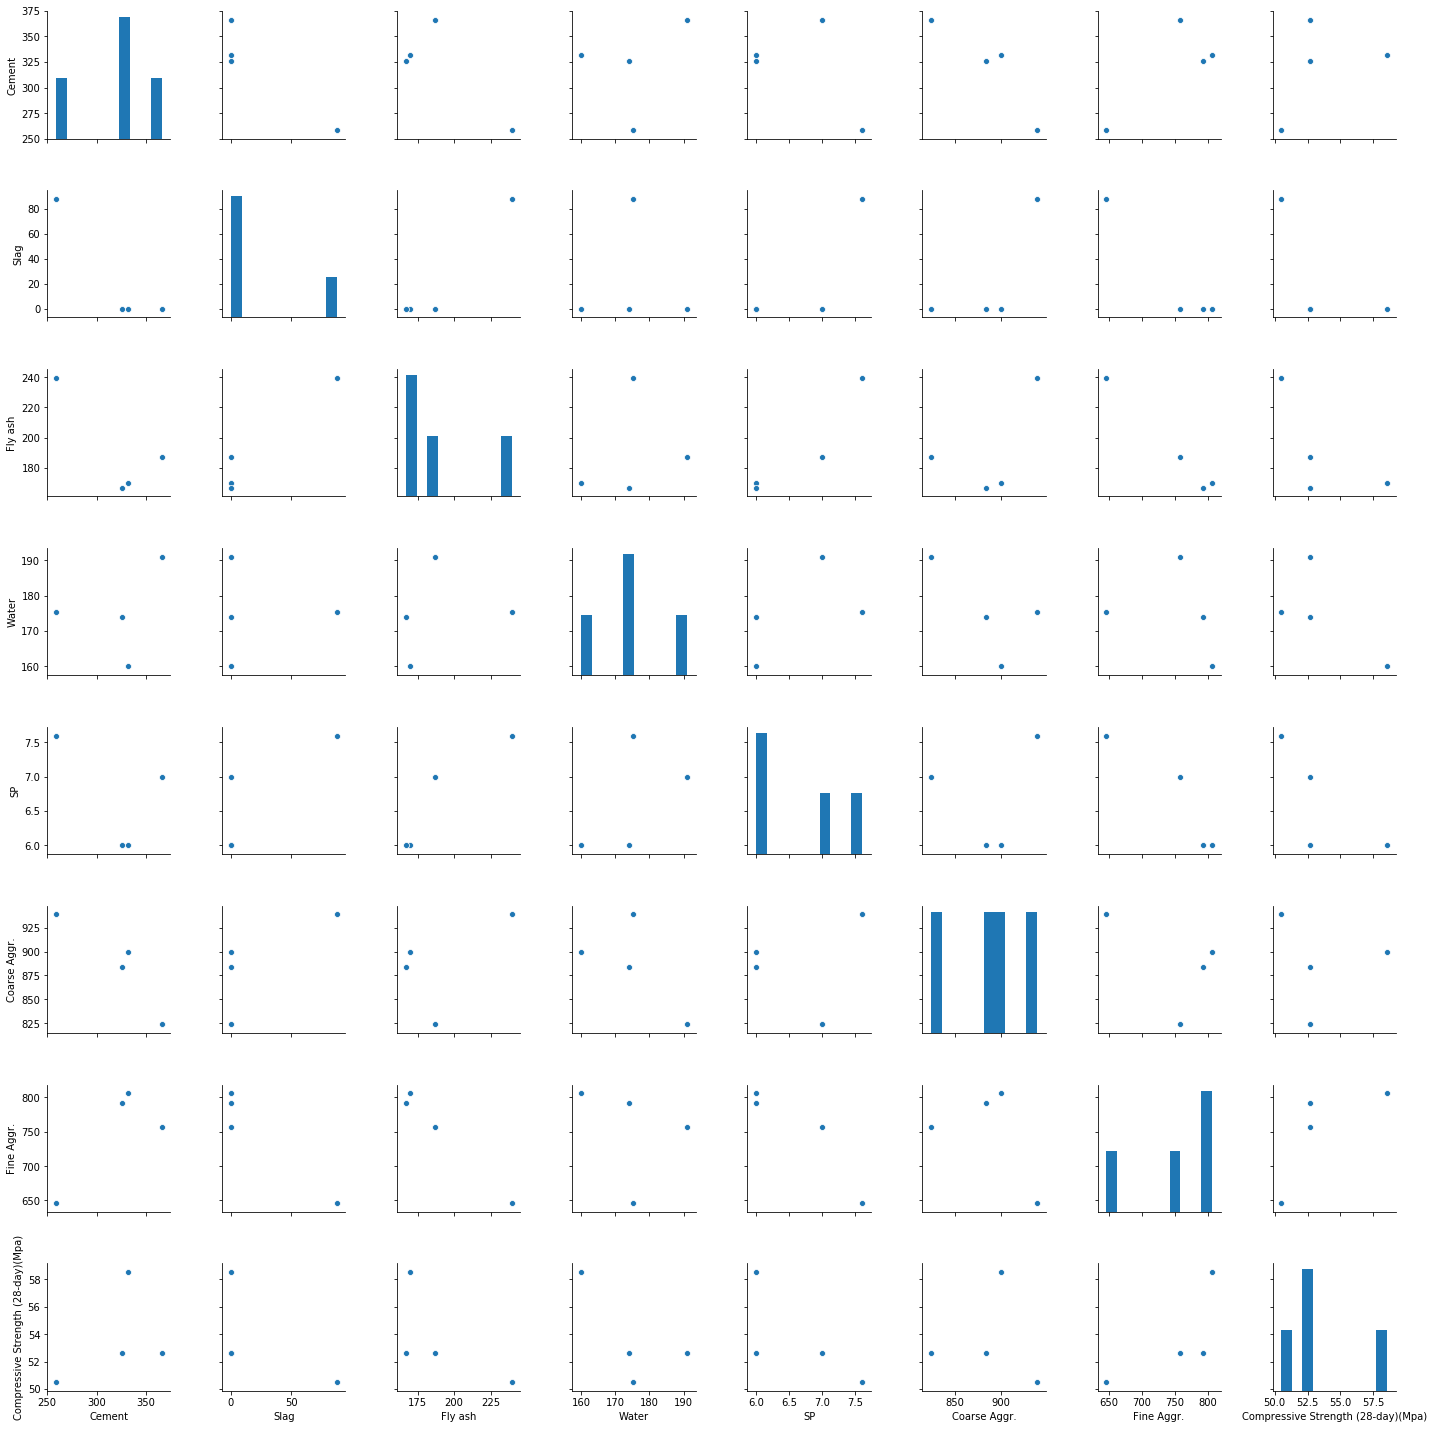

In [100]:
sns.pairplot(df[df['cs_bin'] == '[50 - 60]'].drop(extra_columns, axis=1))

After generating some visualizations of the correlations between variables and compressive strength, it seems as though fly ash is a very large determinant of the compressive strength, at least when strength is very low.  Upon closer inspection though, via a scatterplot, it appears that fly ash may not be used at all in low strength concrete, but when it is the strength increases.  After looking at scatterplots of each variable, even when broken into bins, none of them have an especially strong correlation with compressive strength; none of them singlehandedly affect the strength too much, so perhaps what matters is the interaction between ingredients.

While none of the inputs are especially highly correlated with strength, cement and fly ash appear to have the only positive correlation with strength, according to my bar chart that plots each variable's correlation.

In [275]:
# split data into features and target variables
X = df[['cement', 'fly_ash']]
y = df['compressive_strength_(28-day)(mpa)']

In [278]:
# create a holdout test set for later
X, X_test, y, y_test = train_test_split(X, y, test_size=.2, random_state=10)
X, y = np.array(X), np.array(y)


In [359]:
# use kfold cross validation to methodically check for the ideal depth value by building models with increasing
# values for depth, and seeing which one has the best average r^2 score after
kf = KFold(n_splits=5, shuffle=True, random_state = 71)
dtr_scores = []
for i in range(3, 8):
    for train_ind, val_ind in kf.split(X,y):
    
        X_train, y_train = X[train_ind], y[train_ind]
        X_val, y_val = X[val_ind], y[val_ind] 
    
        dtrmodel = tree.DecisionTreeRegressor(min_samples_split=10, max_depth=i, min_samples_leaf=5)
        dtrmodel.fit(X_train, y_train)
    
    
    
        dtr_scores.append(dtrmodel.score(X_val, y_val))
    print('r^2 scores of tree with depth of {0}: {1}'.format(i, dtr_scores))
    print(f'simple mean r^2: {np.mean(dtr_scores):.3f} +- {np.std(dtr_scores):.3f}')
    print()


r^2 scores of tree with depth of 3: [0.6188901634184769, 0.4578316541239657, 0.7751318839904953, 0.5265135316899886, 0.5752278275910958]
simple mean r^2: 0.591 +- 0.107

r^2 scores of tree with depth of 4: [0.6188901634184769, 0.4578316541239657, 0.7751318839904953, 0.5265135316899886, 0.5752278275910958, 0.6052030549760209, 0.5347108731216018, 0.7265075452745018, 0.5351004463512643, 0.6517258584275831]
simple mean r^2: 0.601 +- 0.092

r^2 scores of tree with depth of 5: [0.6188901634184769, 0.4578316541239657, 0.7751318839904953, 0.5265135316899886, 0.5752278275910958, 0.6052030549760209, 0.5347108731216018, 0.7265075452745018, 0.5351004463512643, 0.6517258584275831, 0.605203054976021, 0.5347108731216023, 0.73068085434479, 0.5351004463512643, 0.651725858427583]
simple mean r^2: 0.604 +- 0.087

r^2 scores of tree with depth of 6: [0.6188901634184769, 0.4578316541239657, 0.7751318839904953, 0.5265135316899886, 0.5752278275910958, 0.6052030549760209, 0.5347108731216018, 0.726507545274501

In [360]:
# build decision tree model with determined optimal parameters
dtrmodel = tree.DecisionTreeRegressor(min_samples_split=10, max_depth=7, min_samples_leaf=5)
dtrmodel.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=7, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=5,
           min_samples_split=10, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

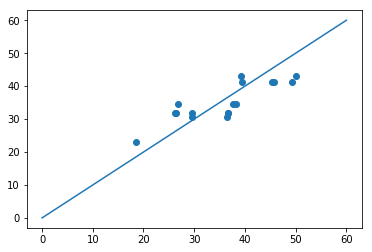

In [377]:
# plot the residuals of the tree's predictions.  the closer the dots are to the best-fit line, the more accurate
# the predictions are
tree_pred_test = dtrmodel.predict(X_test)
plt.scatter(y_test, tree_pred_test,alpha=1)
plt.plot(np.linspace(0,60,10),np.linspace(0,60,10))

In [362]:
# find the test set score of the model
dtrmodel.score(X_test, y_test)

0.6682356994282899

In [378]:
# find the root mean squared error of the model
np.sqrt(np.mean((tree_pred_test - y_test)**2))

4.931379398803098

In [369]:
# create a graphic that depicts the tree's decision making 
tree.export_graphviz(dtrmodel, out_file='tree.dot',feature_names = X_test.columns)

In [370]:
!head tree.dot

digraph Tree {
node [shape=box] ;
0 [label="cement <= 168.5\nmse = 56.692\nsamples = 52\nvalue = 35.388"] ;
1 [label="fly_ash <= 138.0\nmse = 29.92\nsamples = 22\nvalue = 30.733"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="mse = 18.821\nsamples = 5\nvalue = 22.914"] ;
1 -> 2 ;
3 [label="cement <= 149.7\nmse = 9.915\nsamples = 17\nvalue = 33.032"] ;
1 -> 3 ;
4 [label="mse = 6.985\nsamples = 9\nvalue = 31.759"] ;


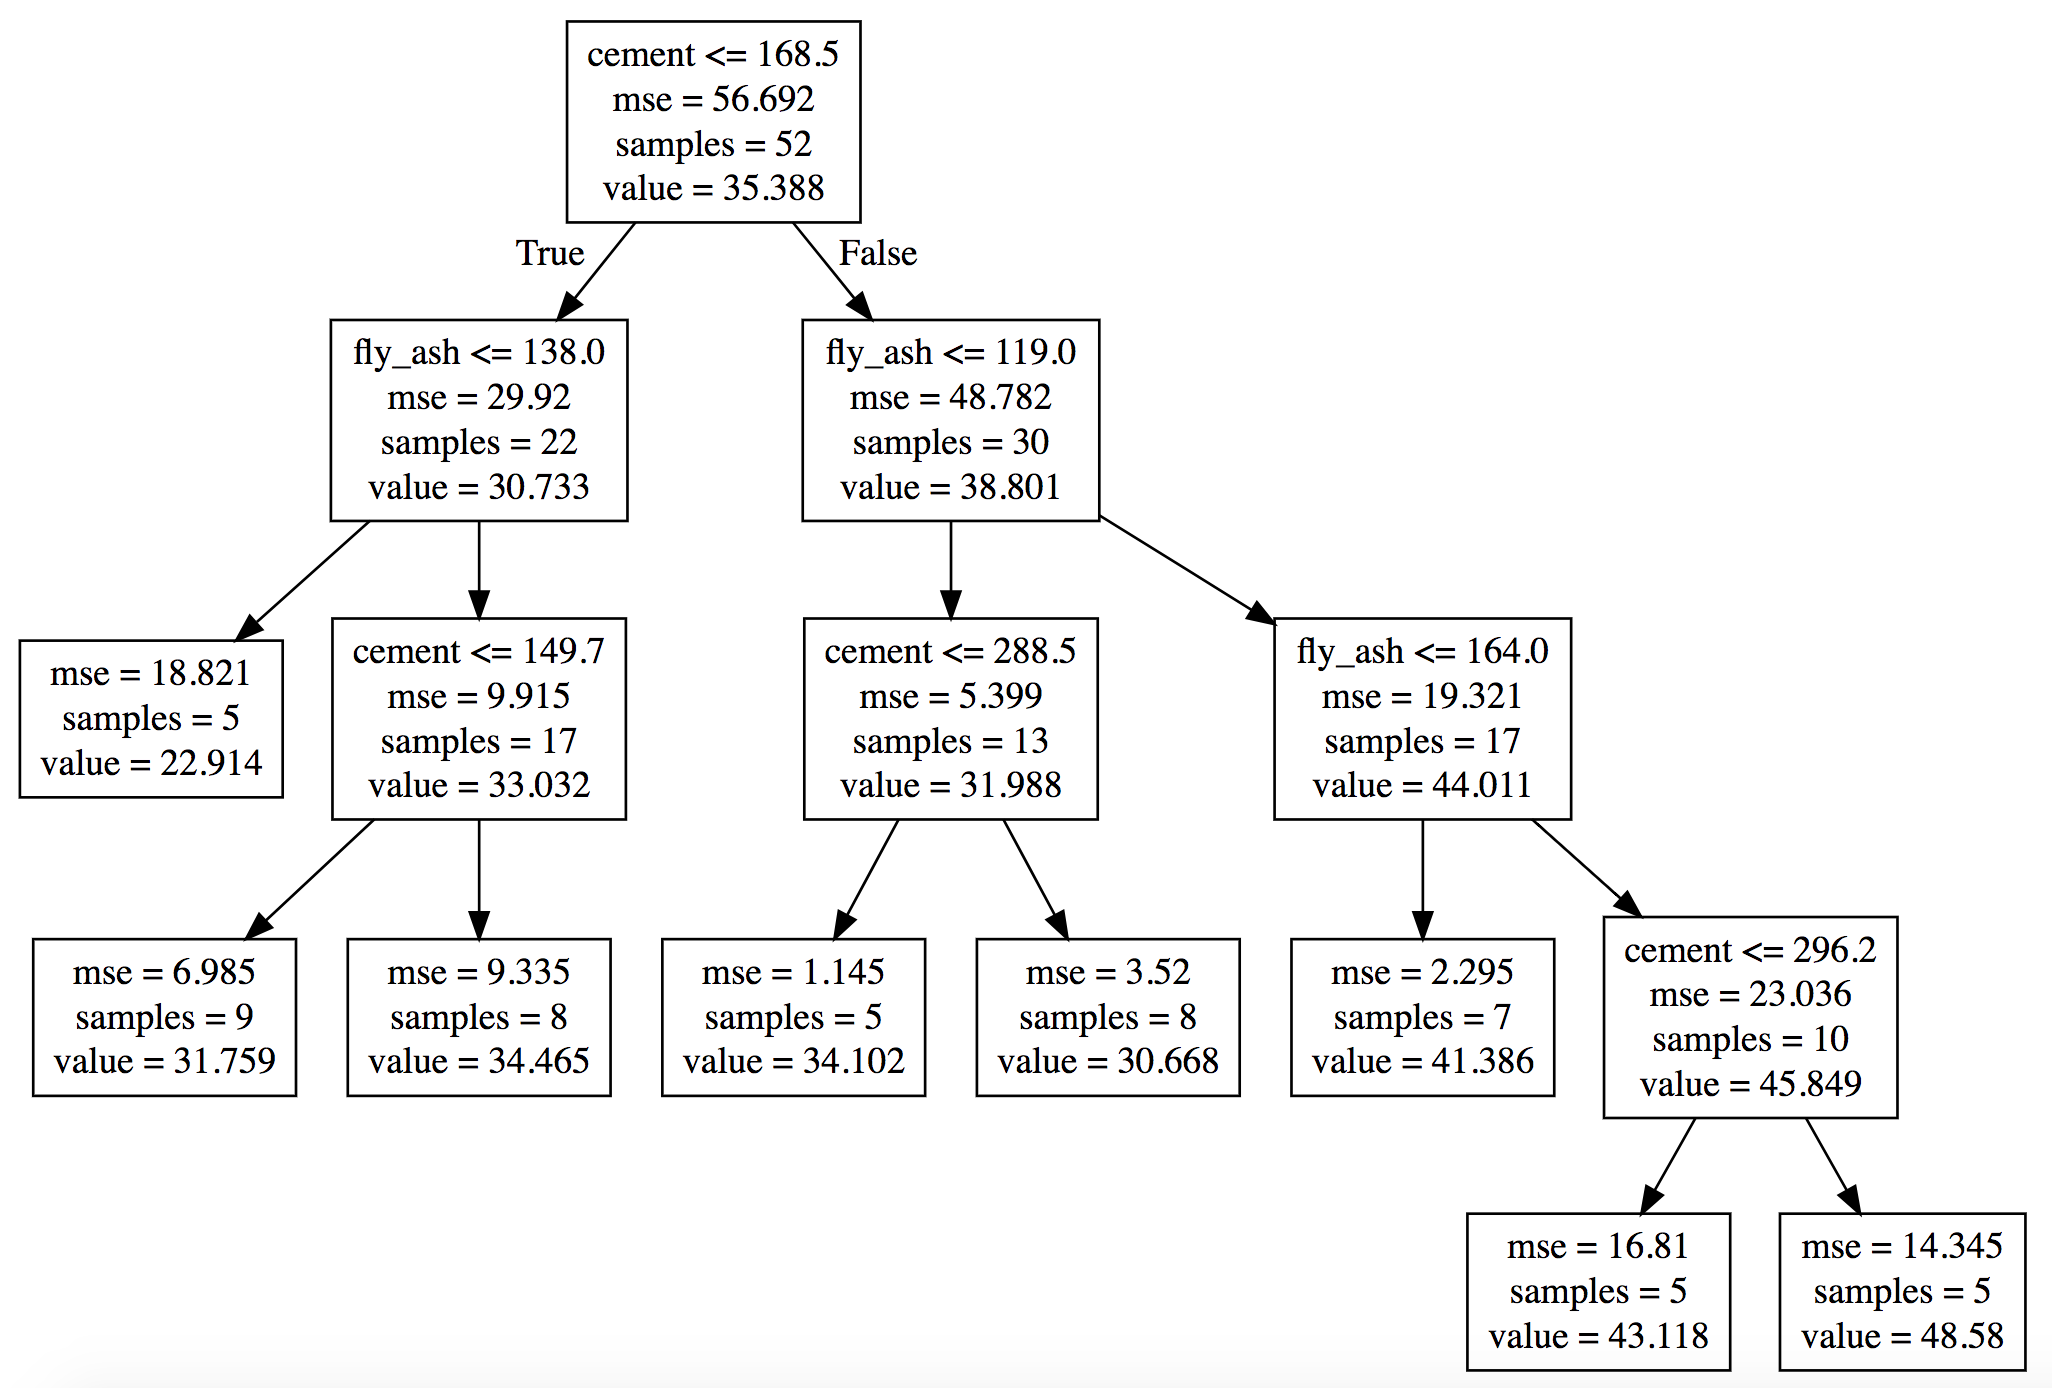

I have generated a visual representation of my decision tree that actually maps out how the tree is making decisions.  The tree begins be checking if a given batch of concrete has less than or equal to 168.5 concrete, and then splits into two paths.  It then checks how much fly ash is included in the batch and makes decisions based on that.  As the tree continues splitting based on how much fly ash and cement there is in the batch, it makes predictions on what the compressive strength of the given batch will be.  

The test set root mean squared error for my decision tree is 4.93.  This value tells us that on average, the decision tree's prediction of compression strength is off by about 4.93mpa. 

I found the ideal depth of my tree to be 7.  I determined this by cross-validating different values of depth.  I essentially built the model with varying values until I found the model with the best r^2 value, and that happened to be a model with a depth of 7.

The test set r^2, or coefficient of determination, value of my decision tree came out to be about 0.67.  The r^2 value of a model is the proportion of the variance in the dependent variable that is predictable from the independent variables.  Essentially, the two input variables I used, cement and fly ash, can roughly account for about 67% of the compressive strength value. 

In [380]:
X = df.drop(['no', 'slump(cm)', 'flow(cm)', 'cs_bin'], axis=1)
y = df['compressive_strength_(28-day)(mpa)']

In [381]:
X, X_test, y, y_test = train_test_split(X, y, test_size=.2, random_state=10)
X, y = np.array(X), np.array(y)

In [454]:
# determine ideal value for max_features
np.sqrt(7)

2.6457513110645907

In [395]:
# cross-validate to determine best value for number of trees (n_estimators)
kf = KFold(n_splits=5, shuffle=True, random_state = 71)
rf_scores = []
for i in range(10, 110, 10):
    for train_ind, val_ind in kf.split(X,y):
    
        X_train, y_train = X[train_ind], y[train_ind]
        X_val, y_val = X[val_ind], y[val_ind] 
    
        rfmodel = RandomForestRegressor(n_estimators = i, min_samples_leaf=4, max_features=4, n_jobs=-1)
        rfmodel.fit(X_train, y_train)
    
    
    
        rf_scores.append(rfmodel.score(X_val, y_val))
    print('r^2 scores of tree with {0} trees: {1}'.format(i, rf_scores))
    print(f'valiidation set mean r^2: {np.mean(rf_scores):.3f} +- {np.std(rf_scores):.3f}')
    print()

r^2 scores of tree with 10 trees: [0.9633904711650558, 0.8871857340809138, 0.8787622600645719, 0.7276410713466133, 0.8731287533460442]
valiidation set mean r^2: 0.866 +- 0.077

r^2 scores of tree with 20 trees: [0.9633904711650558, 0.8871857340809138, 0.8787622600645719, 0.7276410713466133, 0.8731287533460442, 0.9384227906763906, 0.9437524597084188, 0.9158429734100229, 0.8168380710382548, 0.865824991411032]
valiidation set mean r^2: 0.881 +- 0.066

r^2 scores of tree with 30 trees: [0.9633904711650558, 0.8871857340809138, 0.8787622600645719, 0.7276410713466133, 0.8731287533460442, 0.9384227906763906, 0.9437524597084188, 0.9158429734100229, 0.8168380710382548, 0.865824991411032, 0.9628968356877342, 0.9596747249309066, 0.8869376111200534, 0.8238757817371617, 0.8933041700632822]
valiidation set mean r^2: 0.889 +- 0.062

r^2 scores of tree with 40 trees: [0.9633904711650558, 0.8871857340809138, 0.8787622600645719, 0.7276410713466133, 0.8731287533460442, 0.9384227906763906, 0.94375245970841

Cross validation suggests that 60 trees is the ideal number of trees

In [501]:
rfmodel = RandomForestRegressor(n_estimators = 60, min_samples_leaf=4, max_features=3, n_jobs=-1)
rfmodel.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=3, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=4,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=60, n_jobs=-1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [506]:
rfmodel.score(X_val, y_val)

0.9030705384742783

In [505]:
rfmodel.score(X_test, y_test)

0.9287836384215477

However, we are getting a higher r^2 score on the test set than the validation set, suggesting that we are overfitting and need to cut down on trees

In [444]:
kf = KFold(n_splits=5, shuffle=True, random_state = 71)
rf_scores = []
for i in range(2, 22, 2):
    for train_ind, val_ind in kf.split(X,y):
    
        X_train, y_train = X[train_ind], y[train_ind]
        X_val, y_val = X[val_ind], y[val_ind] 
    
        rfmodel = RandomForestRegressor(n_estimators = i, min_samples_leaf=4, max_features=4, n_jobs=-1)
        rfmodel.fit(X_train, y_train)
    
    
    
        rf_scores.append(rfmodel.score(X_val, y_val))
    print('r^2 scores of tree with {0} trees: {1}'.format(i, rf_scores))
    print(f'valiidation set mean r^2: {np.mean(rf_scores):.3f} +- {np.std(rf_scores):.3f}')
    print()

r^2 scores of tree with 2 trees: [0.790156101697661, 0.8342475598944853, 0.7648439014173597, 0.5712389355631835, 0.8485087126843096]
valiidation set mean r^2: 0.762 +- 0.100

r^2 scores of tree with 4 trees: [0.790156101697661, 0.8342475598944853, 0.7648439014173597, 0.5712389355631835, 0.8485087126843096, 0.8930843779909332, 0.9518269290817598, 0.8048502832196102, 0.7743342015287978, 0.8139490737756188]
valiidation set mean r^2: 0.805 +- 0.095

r^2 scores of tree with 6 trees: [0.790156101697661, 0.8342475598944853, 0.7648439014173597, 0.5712389355631835, 0.8485087126843096, 0.8930843779909332, 0.9518269290817598, 0.8048502832196102, 0.7743342015287978, 0.8139490737756188, 0.8706157455265084, 0.9473499873135004, 0.8990829725603352, 0.8121087109401148, 0.8576871699500653]
valiidation set mean r^2: 0.829 +- 0.088

r^2 scores of tree with 8 trees: [0.790156101697661, 0.8342475598944853, 0.7648439014173597, 0.5712389355631835, 0.8485087126843096, 0.8930843779909332, 0.9518269290817598, 0.

10 trees seems to be a good number for now, given that there are diminishing returns with more trees, and 10 doesn't overfit the data

In [451]:
rfmodel = RandomForestRegressor(n_estimators = 10, min_samples_leaf=6, max_features=3, n_jobs=-1)
rfmodel.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=3, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=6,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=-1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [452]:
rfmodel.score(X_val, y_val)

0.825155622709817

In [453]:
rfmodel.score(X_test, y_test)

0.8080969084056348

In [456]:
# Add some interaction features
df['water_to_cement'] = df['water'] / df['cement']
df['coarse_to_fine'] = df['coarse_aggr'] / df['fine_aggr']

In [463]:
# drop water, cement, coarse_aggr, and fine_aggr after determining that the model performs better without them
# once the interaction terms are included
X = df.drop(['no', 'slump(cm)', 'flow(cm)', 'cs_bin', 'water', 'cement', 'coarse_aggr', 'fine_aggr'], axis=1)
y = df['compressive_strength_(28-day)(mpa)']

X, X_test, y, y_test = train_test_split(X, y, test_size=.2, random_state=10)
X, y = np.array(X), np.array(y)

In [469]:
kf = KFold(n_splits=5, shuffle=True, random_state = 71)
rf_scores = []
for i in range(2, 22, 2):
    for train_ind, val_ind in kf.split(X,y):
    
        X_train, y_train = X[train_ind], y[train_ind]
        X_val, y_val = X[val_ind], y[val_ind] 
    
        rfmodel = RandomForestRegressor(n_estimators = i, min_samples_leaf=4, max_features=3, n_jobs=-1)
        rfmodel.fit(X_train, y_train)
    
    
    
        rf_scores.append(rfmodel.score(X_val, y_val))
    print('r^2 scores of tree with {0} trees: {1}'.format(i, rf_scores))
    print(f'valiidation set mean r^2: {np.mean(rf_scores):.3f} +- {np.std(rf_scores):.3f}')
    print()

r^2 scores of tree with 2 trees: [0.9098698795678688, 0.9485392600916629, 0.8120548395925986, 0.8427238154918754, 0.788687183312956]
valiidation set mean r^2: 0.860 +- 0.060

r^2 scores of tree with 4 trees: [0.9098698795678688, 0.9485392600916629, 0.8120548395925986, 0.8427238154918754, 0.788687183312956, 0.9576348954997532, 0.8478928193698484, 0.8997893997338398, 0.8539967110474245, 0.8434240285125756]
valiidation set mean r^2: 0.870 +- 0.053

r^2 scores of tree with 6 trees: [0.9098698795678688, 0.9485392600916629, 0.8120548395925986, 0.8427238154918754, 0.788687183312956, 0.9576348954997532, 0.8478928193698484, 0.8997893997338398, 0.8539967110474245, 0.8434240285125756, 0.955759158379643, 0.910825943567838, 0.7422899287476883, 0.8177654037375487, 0.9051807989846753]
valiidation set mean r^2: 0.869 +- 0.062

r^2 scores of tree with 8 trees: [0.9098698795678688, 0.9485392600916629, 0.8120548395925986, 0.8427238154918754, 0.788687183312956, 0.9576348954997532, 0.8478928193698484, 0.89

In [528]:
# build a model with optimal parameters
rfmodel = RandomForestRegressor(n_estimators = 8, min_samples_leaf=4, max_features=3, n_jobs=-1)
rfmodel.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=3, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=4,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=8, n_jobs=-1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [529]:
rfmodel.score(X_val, y_val)

0.9112916657917619

In [530]:
rfmodel.score(X_test, y_test)

0.8909167581603074

There seems to be less of an improvement in score after 8 trees, and 8 does not appear to be severely overfitting, so I chose 8 as the value for the number of trees

The model is achieving higher scores on average with these interaction terms included

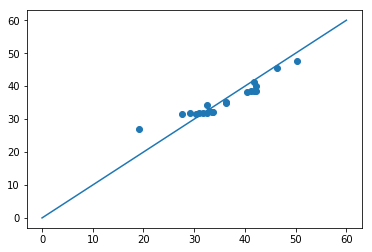

In [510]:
# generate a graph that shows the residuals
# this graph shows what values the model predicted for every true datapoint
# the closer the datapoints are to the best-fit line, the better
tree_pred_test = rfmodel.predict(X_test)
plt.scatter(y_test, tree_pred_test,alpha=1)
plt.plot(np.linspace(0,60,10),np.linspace(0,60,10))

In [511]:
# calculate root mean squared error
np.sqrt(np.mean((tree_pred_test - y_test)**2))

2.6124177726611744

I ended up using 8 trees in my random forest model.  I decided on that by using cross validation; checking various values as the number of trees and checking which had the highest r^2 value before receiving diminishing returns.  I also checked to make sure values are not severely overfitted by ensuring the test score wasn't higher than the validation score.

My model accounts for 5 features: slag, fly ash, sp, water to cement ratio, and coarse aggregate to fine aggregate ratio.  I determined how many to include by checking if the validation scores were higher or lower depending on what I included.  For example, I found that leaving water and cement in the data led to lower scores once the water to cement ratio had been included, so I removed them.

An alternative method I may have used to predict the compressive strength would be an XGBoost model.  They are much harder to interpret than trees, but they have excellent predictive ability.  

Some other data that may have proven to be helpful in predicting the compressive strength would be not just the amount of each ingredient, but the quality or purity as well.  For example, it may be important that the water included is very clean.  Furthermore, what temperature and humidity the concrete is being created in could be an important determinant as well; perhaps it could affect some chemical reactions.

Based on my initial EDA, I would still be interested in looking into why some ingredients, like slag and fly ash, are not included in some batches, and which ingredients best serve as their replacements.  I would also like to test out some more interaction terms in the predictive models, to see if there are other ingredients whose ratios to each other matter more than just the amount of each used in the batch.  

One possible use-case of these predictive models would simply be helping someone involved in the concrete industry what recipe to use in order to create the strongest concrete.  Knowing how to make the strongest concrete, or perhaps concrete with a particular amount of flow, could be very useful to someone involved in creating it for a living.  I imagine the properties of concrete, such as strength and flow, are of great importance when it comes to deciding which concrete to use in a construction project.  If a batch isn't strong enough, it could be disastrous.  As such, I believe someone tasked with making concrete that is used in construction projects would be very interested in knowing how to ensure certain levels of quality.  